<a href="https://colab.research.google.com/github/Ron-Rocks/ImageClassification/blob/master/IrisClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning using the UCI Iris Flower Dataset:


> This dataset contains the following information (in cm):
>>1.Sepal Length

>>2.Sepal Width

>>3.Petal Length

>>4.Petal Width

>Based on this information we need to classify the flowers into 3 classes:

>>1.Iris Setosa

>>2.Iris Versicolour

>>3.Iris Virginica

We will be solving this problem using Neural Networks





In [0]:
import pandas
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
import os
import datetime

# Data Preporcessing:

The data we currently have contains Strings as labels ex:"Iris Setosa"

So, first we need to convert these labels into integer form by using the 

*sklearn LabelEncoder*

And then we will convert these integers to the one hot form ex:(0,1,0) for "iris Versicolour". Using   *to_categorical()*

And then we will split our Training and Testing data.


>  1.String data to int

>  2.Then int to one hot vectors

>3.Split the data into Training and Testing

In [0]:
def PrepareData(testPercent):
    irisPath = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    rawData = pandas.read_csv(irisPath)

    dataset = rawData.values

    x = dataset[:,0:4]
    x = x.astype(float)
    y = dataset[:,4]

    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)

    y = to_categorical(y)

    xTrain,xTest,yTrain,yTest = train_test_split(x,y,shuffle = True,test_size = testPercent)
    return xTrain,xTest,yTrain,yTest

xTrain,xTest,yTrain,yTest = PrepareData(testPercent = 0.2)

Loading in the tensorboard for Data Visualisation

In [0]:
%load_ext tensorboard
logdir = os.path.join("logger", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
Tensorboardcallback = TensorBoard(log_dir=logdir,histogram_freq=5,batch_size=64)

# Creating The model:

>The model will contain :
>>1.Input layer with shape (batch_size,4)

>>2.2 Dense layers with relu activation

>>3.A Dropuot layer as a measure against overfitting

>>4.3 Dense Layers with relu activation

>>5.Then,a Dense layer as outputs with 3 outputs

>See the representation of the model in the output of the code below :-








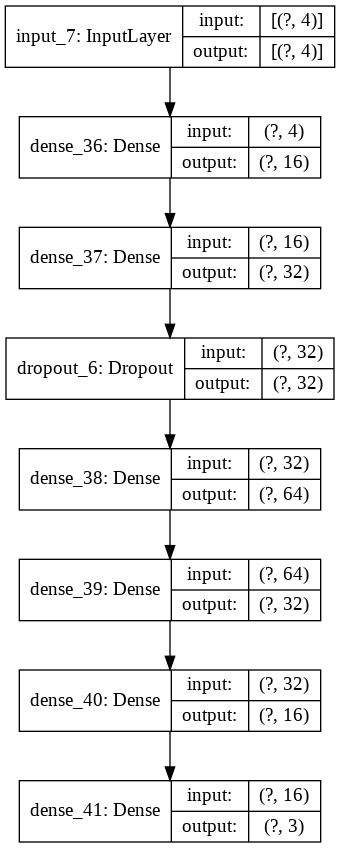

In [14]:
def CreateModel():

    inputLayer = Input(shape = (4))

    dense1 = Dense(16,activation="relu")(inputLayer)
    dense2 = Dense(32,activation="relu")(dense1)
    dropout = Dropout(0.2)(dense2)
    dense3 = Dense(64,activation="relu")(dropout)
    dense4 = Dense(32,activation="relu")(dense3)
    dense5 = Dense(16,activation="relu")(dense4)

    outputLayer = Dense(3,activation="sigmoid")(dense5)

    model = Model(inputLayer,outputLayer)
    model.compile(loss = "categorical_crossentropy",optimizer ="adam",metrics=["accuracy"])

    return model


model = CreateModel()
plot_model(model,show_shapes=True)

# Fitting and visualizing acc and loss through Tensorboard
>callbacks - The tensorboard Callback

>

In [0]:
model.fit(xTrain,yTrain,epochs=100,batch_size=64,callbacks=[Tensorboardcallback],validation_data=(xTest,yTest))

In [0]:
%tensorboard --logdir logger